In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use("ggplot")

import matplotlib.ticker as ticker
# Convert CSV Delimit: Click Data -> Text to Column -> Tab -> Next -> Finish

In [417]:
data = pd.read_csv("/Users/kerrylam/Desktop/Linguistics-Research/ex.csv")
data = pd.DataFrame(data)

In [418]:
data.head()

,TierType,TierName,Label,Start,Mid,End,Duration
0,IntervalTier,words,NaN,0,2032,4064,4064
1,IntervalTier,words,cheese,4064,4497,4930,866
2,IntervalTier,words,NaN,4930,6013,7097,2167
3,IntervalTier,words,egg,7097,7568,8039,942
4,IntervalTier,words,NaN,8039,8764,9489,1450


In [419]:
data.dropna(inplace = True)
# Drop Missing Data

In [420]:
data.head()

,TierType,TierName,Label,Start,Mid,End,Duration
1,IntervalTier,words,cheese,4064,4497,4930,866
3,IntervalTier,words,egg,7097,7568,8039,942
5,IntervalTier,words,goat,9489,9781,10073,584
7,IntervalTier,words,tackle,11637,12079,12522,885
9,IntervalTier,words,everyone,13539,14019,14500,961


In [421]:
# Create Previous Time Column
# Shift Data Down: Delete First Row of Previous_Time_Column
start_time = data.ix[:,"Start"]
prev_time = data["Previous_Time"] = data["Start"].shift()
# Create Beging Time Variable 
data["Begin_Time"] = start_time - prev_time
data.dropna(inplace = True)
data.head()

,TierType,TierName,Label,Start,Mid,End,Duration,Previous_Time,Begin_Time
3,IntervalTier,words,egg,7097,7568,8039,942,4064.0,3033.0
5,IntervalTier,words,goat,9489,9781,10073,584,7097.0,2392.0
7,IntervalTier,words,tackle,11637,12079,12522,885,9489.0,2148.0
9,IntervalTier,words,everyone,13539,14019,14500,961,11637.0,1902.0
11,IntervalTier,words,event,16177,16516,16855,678,13539.0,2638.0


In [422]:
# Create Count for Number of Words Starting From 1 (For Word 1) and Add 1 to Length 
n_words = range(1,len(data["Begin_Time"]) + 1)
print(n_words)

range(1, 105)


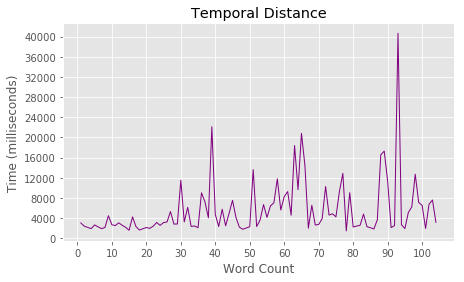

In [423]:
# Plot X,Y
plt.figure(figsize=(7, 4))
plt.plot(n_words, data["Begin_Time"], c = "purple", linewidth = 1)
plt.xlabel("Word Count")
plt.ylabel("Time (milliseconds)")
plt.title("Temporal Distance")

# Set Intervals
setaxis = plt.axes()
setaxis.xaxis.set_major_locator(ticker.MultipleLocator(10))
setaxis.yaxis.set_major_locator(ticker.MultipleLocator(4000))

In [424]:
y = data["Begin_Time"]

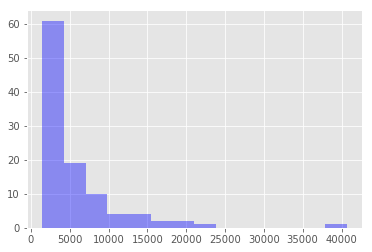

In [425]:
plt.hist(y, bins = 14, alpha = 0.4, color = 'blue')
plt.show()

In [434]:
start_time = start_time[1:105]
prev_time = prev_time[1:105]
X = start_time, prev_time
X = np.asarray(X).reshape(-1,2)
y = np.asarray(y)

5290.17881438
[ 0.11268058 -0.10889431]


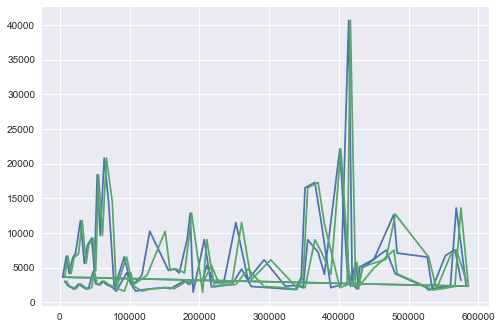

In [442]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
X_train, X_Test, y_train, y_test = train_test_split(X, y, random_state = 1)
reg = LinearRegression()
reg.fit(X, y)
print(reg.intercept_)
print(reg.coef_)
plt.plot(X, y)